# 4.- Filtros

#### Filtros y respuesta en frecuencia de señal 

In [8]:
import scipy.io as sio
import scipy.io as sio
mat = sio.loadmat('Reposo1.mat')
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import signal
import matplotlib.pyplot as plt

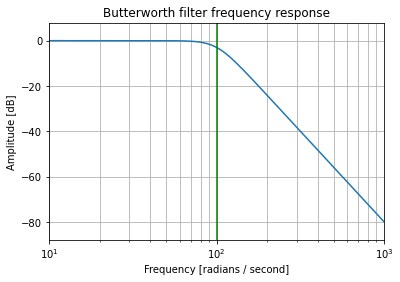

In [9]:
b, a = signal.butter(4, 100, 'low', analog=True)
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(100, color='green') # cutoff frequency
plt.show()

#### Diseño de filtros digitales, FIR e IIR para señal

In [10]:
from scipy import signal
import matplotlib.pyplot as plt

<Figure size 432x288 with 0 Axes>

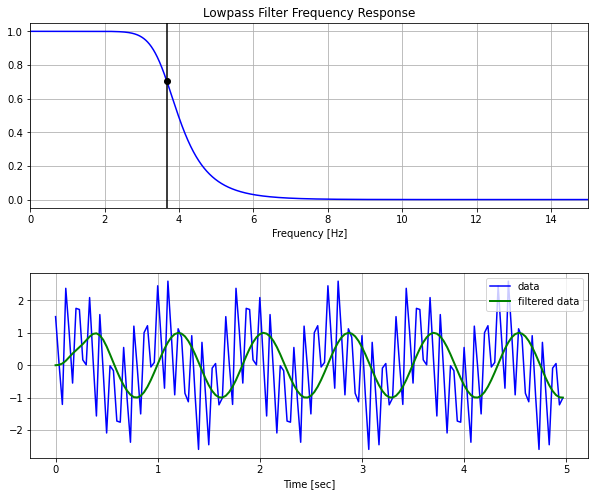

In [11]:
import numpy as np
from scipy.signal import butter, lfilter, freqz
import matplotlib.pyplot as plt


def butter_lowpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = lfilter(b, a, data)
    return y


# Setting standard filter requirements.
order = 6
fs = 30.0       
cutoff = 3.667  

b, a = butter_lowpass(cutoff, fs, order)

# Plotting the frequency response.
plt.figure(1)
plt.figure(figsize = (10, 8))
w, h = freqz(b, a, worN=8000)
plt.subplot(2, 1, 1)
plt.plot(0.5*fs*w/np.pi, np.abs(h), 'b')
plt.plot(cutoff, 0.5*np.sqrt(2), 'ko')
plt.axvline(cutoff, color='k')
plt.xlim(0, 0.5*fs)
plt.title("Lowpass Filter Frequency Response")
plt.xlabel('Frequency [Hz]')
plt.grid()


# Creating the data for filteration
T = 5.0         # value taken in seconds
n = int(T * fs) # indicates total samples
t = np.linspace(0, T, n, endpoint=False)

data = np.sin(1.2*2*np.pi*t) + 1.5*np.cos(9*2*np.pi*t) + 0.5*np.sin(12.0*2*np.pi*t)

# Filtering and plotting
y = butter_lowpass_filter(data, cutoff, fs, order)

plt.subplot(2, 1, 2)
plt.plot(t, data, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()
plt.legend()

plt.subplots_adjust(hspace=0.35)
plt.show()

In [12]:
data=mat['data']
x=data[:,2]
t=np.arange(60001)

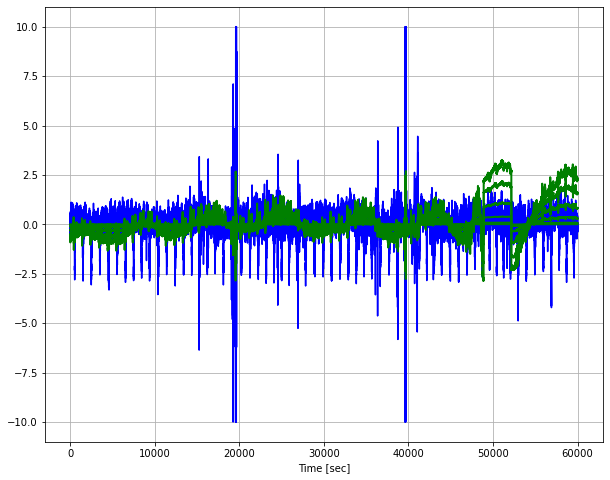

In [13]:
# Filtering and plotting
y = butter_lowpass_filter(data, cutoff, fs, order)
plt.figure(figsize = (10, 8))
plt.plot(t,x, 'b-', label='data')
plt.plot(t, y, 'g-', linewidth=2, label='filtered data')
plt.xlabel('Time [sec]')
plt.grid()

plt.subplots_adjust(hspace=0.35)
plt.show()